# Dependencies

In [39]:
pacman::p_load(factoextra, dplyr)

# Functions

# Paths

In [40]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Plots/"
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Manifests/"
gitpath <- "/Users/anabbi/git/ped_CapTCRseq/"
h4hpath <- "/Users/anabbi/Desktop/H4H/INTERCEPT/"

# Main

In [41]:
meta_div <- readr::read_rds(paste0(datapath, "capTCRseq/meta_div_goodsamples.rds"))

In [42]:
meta_div <- meta_div[ !is.na(meta_div$TRB), ]

In [43]:
table(meta_div$sampletype)


 PBMC Tumor cfDNA 
  258    17   270 

In [44]:
meta_div <- meta_div[ meta_div$sampletype == "PBMC",]

In [45]:
head(meta_div)

,sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,Pass,CD3,...,observed_Shannon,estimated_Shannon,SE_Shannon,observed_Simpson,estimated_Simpson,SE_Simpson,file,basename,Group,sampletype
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<lgl>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,CHP_10YO_M_00,CHP_10YO_M,X00,NA,NA,NA,Normal,NA,NA,NA,...,10.591,10.601,0.074,8.556,8.561,0.097,batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_10YO-M_PBMC_DNA.txt,CHP_10YO-M_PBMC_DNA,CHP,PBMC
2,CHP_11YO_M_00,CHP_11YO_M,X00,NA,NA,NA,Normal,NA,NA,NA,...,11.607,11.614,0.055,10.406,10.414,0.074,batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_11YO-M_PBMC_DNA.txt,CHP_11YO-M_PBMC_DNA,CHP,PBMC
3,CHP_15YO_F_A_00,CHP_15YO_F_A,X00,NA,NA,NA,Normal,NA,NA,NA,...,8.982,8.989,0.042,8.560,8.570,0.060,batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_15YO-F-A_PBMC_DNA.txt,CHP_15YO-F-A_PBMC_DNA,CHP,PBMC
4,CHP_15YO_F_B_00,CHP_15YO_F_B,X00,NA,NA,NA,Normal,NA,NA,NA,...,6.330,6.334,0.039,5.870,5.876,0.059,batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_15YO-F-B_PBMC_DNA.txt,CHP_15YO-F-B_PBMC_DNA,CHP,PBMC
5,CHP_15YO_M_00,CHP_15YO_M,X00,NA,NA,NA,Normal,NA,NA,NA,...,21.110,21.120,0.040,20.321,20.339,0.079,batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_15YO-M_PBMC_DNA.txt,CHP_15YO-M_PBMC_DNA,CHP,PBMC
6,CHP_16YO_M_00,CHP_16YO_M,X00,NA,NA,NA,Normal,NA,NA,NA,...,3.972,3.973,0.007,3.944,3.946,0.012,batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_16YO-M_PBMC_DNA.txt,CHP_16YO-M_PBMC_DNA,CHP,PBMC


In [46]:
int_v_j_cdr3_l <- readr::read_rds(paste0(datapath, "capTCRseq/int_pbmc_v_j_cdr3_l.rds"))

In [47]:
# should be done for all files
jfreq <- int_v_j_cdr3_l %>% group_by(TRBJ) %>% tally() %>% arrange(desc(n)) %>% mutate(freq = n/sum(n))

In [48]:
jfreq

TRBJ,n,freq
<chr>,<int>,<dbl>
TRBJ2-7,11105,0.17207717
TRBJ1-1,9419,0.14595181
TRBJ2-1,8526,0.13211436
TRBJ1-2,7361,0.11406214
TRBJ2-3,6091,0.09438289
TRBJ1-5,4676,0.07245681
TRBJ2-5,3857,0.05976602
TRBJ2-2,3833,0.05939413
TRBJ1-6,2850,0.04416208


In [49]:
readr::write_rds(jfreq, paste0(datapath, "capTCRseq/jfreq_int_pbmc.rds"))

In [50]:
summary(jfreq$freq)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.01068 0.04196 0.05977 0.07692 0.11406 0.17208 

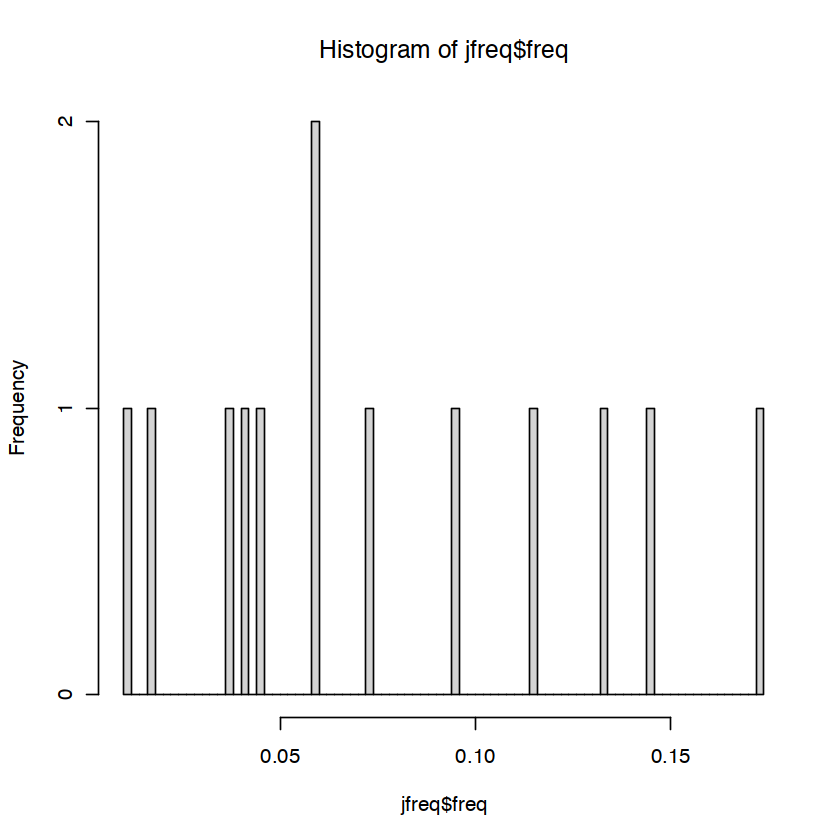

In [51]:
hist(jfreq$freq, breaks = 100)

In [52]:
jgene_mat <- as.data.frame.matrix(table(int_v_j_cdr3_l %>% select(basename, TRBJ  )))

In [53]:
head(jgene_mat)

,TRBJ1-1,TRBJ1-2,TRBJ1-3,TRBJ1-4,TRBJ1-5,TRBJ1-6,TRBJ2-1,TRBJ2-2,TRBJ2-3,TRBJ2-4,TRBJ2-5,TRBJ2-6,TRBJ2-7
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
CHP-328-04-PBMC-DNA,52,46,16,21,37,12,60,21,51,4,31,7,94
CHP-328-05-PBMC-DNA,22,13,4,5,8,3,25,9,19,4,5,1,33
CHP-351-03-PBMC-DNA,114,100,40,38,72,42,151,70,107,10,89,20,238
CHP-353-04-PBMC-DNA,359,269,73,83,138,82,159,78,96,5,87,26,239
CHP-363-04-PBMC-DNA,105,79,24,34,65,40,84,43,69,3,41,20,144
CHP-369-01-PBMC-DNA,76,62,26,25,46,16,95,51,82,10,53,12,173


In [54]:
readr::write_rds(jgene_mat, paste0(datapath, "capTCRseq/int__pbmc_jgene_matrix.rds"))

In [55]:
dim(jgene_mat)

[1] 258  13

In [56]:
cormat <- cor(jgene_mat)

In [57]:
#vgene_mat_hf[,c("TRBV10-3", "TRBV7-9", "TRBV13")]

In [58]:
summary(as.vector(cormat) )

# generally high correlation

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.6524  0.8824  0.9129  0.8909  0.9390  1.0000 

PCA

In [59]:
jgene_mat

,TRBJ1-1,TRBJ1-2,TRBJ1-3,TRBJ1-4,TRBJ1-5,TRBJ1-6,TRBJ2-1,TRBJ2-2,TRBJ2-3,TRBJ2-4,TRBJ2-5,TRBJ2-6,TRBJ2-7
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
CHP-328-04-PBMC-DNA,52,46,16,21,37,12,60,21,51,4,31,7,94
CHP-328-05-PBMC-DNA,22,13,4,5,8,3,25,9,19,4,5,1,33
CHP-351-03-PBMC-DNA,114,100,40,38,72,42,151,70,107,10,89,20,238
CHP-353-04-PBMC-DNA,359,269,73,83,138,82,159,78,96,5,87,26,239
CHP-363-04-PBMC-DNA,105,79,24,34,65,40,84,43,69,3,41,20,144
CHP-369-01-PBMC-DNA,76,62,26,25,46,16,95,51,82,10,53,12,173
CHP-371-03-PBMC-DNA,113,57,12,20,42,23,110,41,53,2,23,12,103
CHP-377-02-PBMC-DNA,83,73,18,31,49,26,61,39,42,3,24,11,53
CHP-386-04-PBMC-DNA,99,70,28,26,46,23,64,51,72,2,17,23,143


In [60]:
mypca <- prcomp(jgene_mat, scale = TRUE)

In [61]:
out <- mypca$x
mydf <- data.frame(out)

In [62]:
head(out)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
CHP-328-04-PBMC-DNA,-2.177149,-0.1661816,0.3687299,-0.2752007,-0.2077164,-0.60414725,-0.16201849,-0.01511295,0.43047095,0.03822050,0.01436271,-0.12182549,-0.10655211
CHP-328-05-PBMC-DNA,1.190934,-0.6575784,-0.2299612,-0.2202804,0.2093163,-0.09342315,-0.13692283,-0.27253515,-0.09391664,0.14894586,0.01185951,-0.04047046,0.05524235
CHP-351-03-PBMC-DNA,-9.601222,-1.0593635,1.6247639,-0.1968443,-1.0710003,-0.18135382,-0.80772967,0.82671338,0.19270228,0.04732945,-0.03199291,0.17698111,-0.07509704
CHP-353-04-PBMC-DNA,-15.586967,4.2694615,-1.8066360,1.6357500,-0.8766210,-0.14746343,0.46986389,-0.46606503,0.35418411,0.63144634,-0.48800149,0.11867217,-0.03119597
CHP-363-04-PBMC-DNA,-5.791357,1.0336797,1.2500966,0.8037380,0.6086951,0.14274773,-0.04513192,0.49346464,0.63107768,-0.24398997,-0.10398872,-0.05122336,-0.01076443
CHP-369-01-PBMC-DNA,-5.409429,-1.7081537,0.8792851,-0.2725720,-0.4129596,-0.69994928,-0.79020279,0.15719192,-0.07271708,0.19836678,-0.43235948,-0.08481869,0.07813747


In [63]:
p0 <- fviz_pca_ind(mypca,geom = "point", pointshape = 16, pointsize = 2, alpha = 1,
                    ellipse.alpha = 0, invisible="quali", repel = TRUE,
                       title = "PCA of frequent J genes (n = 13)")

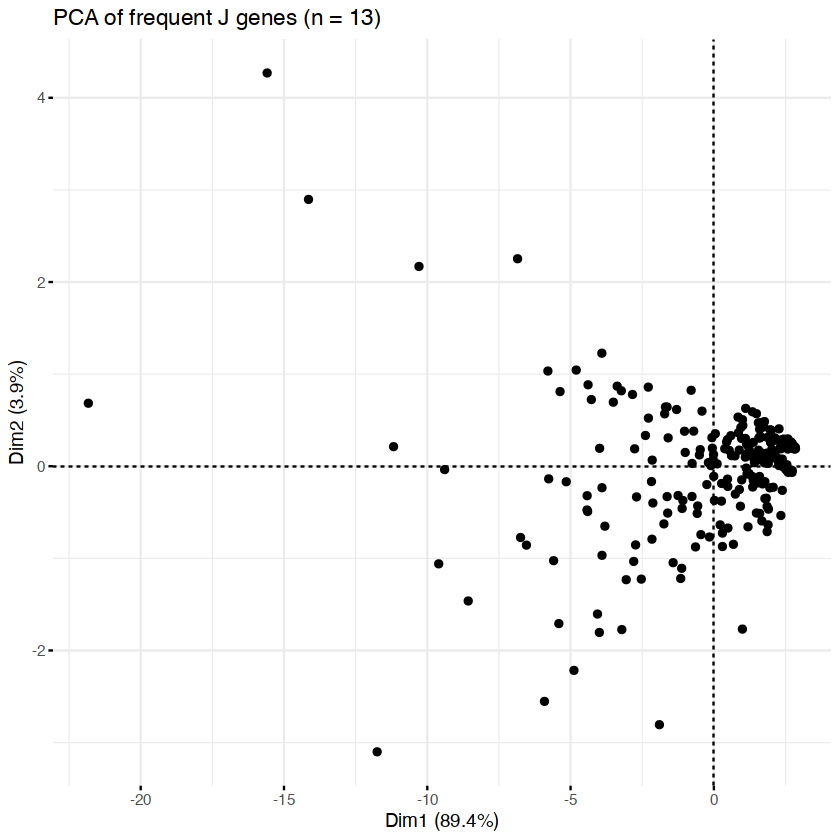

In [64]:
p0

In [65]:
readr::write_rds(mydf, paste0(datapath, "/capTCRseq/INT_PBMC_J_PCA_postqc.rds"))